# Klasifikasi Aktivitas Seizure Mimicking Menggunakan Machine Learning pada Dataset Epilepsy Berbasis Tri-Axial Accelerometer"

## Business Understanding

### Pendahuluan

Penelitian ini bertujuan untuk membangun model machine learning yang mampu mengklasifikasikan aktivitas gerakan manusia berdasarkan sinyal time series dari tri-axial accelerometer yang dipasang pada pergelangan tangan. Dataset yang digunakan dikumpulkan dari enam partisipan sehat yang diminta mensimulasikan empat jenis aktivitas, yaitu Walking, Running, Sawing, dan Seizure Mimicking (epilepsy). Aktivitas seizure mimic dilakukan dengan mengikuti protokol yang dibimbing oleh ahli medis untuk menyerupai gerakan kejang epilepsi, namun dilakukan oleh partisipan yang sehat demi alasan keamanan. Setiap partisipan melakukan masing-masing aktivitas setidaknya sepuluh kali, dengan durasi yang bervariasi antara 30 detik hingga 2 menit dan direkam pada frekuensi 16 Hz. Seluruh sinyal sensor kemudian dipotong dan ditata ulang sehingga memiliki panjang yang seragam (20 time steps) untuk memastikan konsistensi input. Total terdapat 275 sampel yang telah diproses, dengan pembagian partisipan tertentu untuk data train dan lainnya untuk data test.

Dalam konteks bisnis dan aplikasi nyata, pemodelan ini penting untuk pengembangan sistem Human Activity Recognition (HAR) yang dapat membantu dalam berbagai kebutuhan, seperti deteksi dini aktivitas abnormal, monitoring kesehatan, hingga potensi pengenalan pola kejang epilepsi berbasis wearable device. Dengan mengembangkan model klasifikasi yang akurat, penelitian ini bertujuan memberikan kontribusi pada sistem monitoring otomatis yang lebih presisi, efisien, dan dapat diterapkan dalam lingkungan nyata melalui integrasi pada platform seperti Streamlit.

## Data Understanding

### Sumber Dataset

Dataset yang digunakan dalam penelitian ini berasal dari UCR Time Series Classification Archive, yaitu salah satu repositori terbesar untuk dataset analisis time series. Dataset yang digunakan adalah Epilepsy Dataset, yang disajikan dalam bentuk sinyal akselerometer tri-aksial (X, Y, Z) dengan empat kelas aktivitas, yaitu Walking, Running, Sawing, dan Seizure Mimicking (epilepsy). Dataset ini dapat diakses secara publik melalui tautan resmi:

UCR Time Series Classification Archive — Epilepsy Dataset
https://www.timeseriesclassification.com/description.php?Dataset=Epilepsy



### Eksplorasi Dataset

#### 1. Load Dataset

Kode tersebut melakukan proses pemuatan dataset Epilepsy dari koleksi UCR/UEA menggunakan library tslearn. Pertama, modul yang diperlukan diimpor, yaitu UCR_UEA_datasets untuk mengambil dataset time series, numpy untuk pengolahan numerik, serta matplotlib dan seaborn untuk visualisasi. Objek dataset dibuat dari kelas UCR_UEA_datasets(), lalu fungsi load_dataset("Epilepsy") dipanggil untuk memuat data pelatihan dan pengujian, menghasilkan empat variabel: X_train, y_train, X_test, dan y_test, yang masing-masing berisi fitur time series dan labelnya. Terakhir, kode mencetak shape dari tiap variabel agar pengguna mengetahui jumlah sampel dan dimensi time series pada data train dan test yang telah berhasil dimuat.

In [ ]:
!pip install tslearn

In [ ]:
from tslearn.datasets import UCR_UEA_datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = dataset.load_dataset("Epilepsy")

print("Shape X_train :", X_train.shape)
print("Shape X_test  :", X_test.shape)
print("Shape y_train :", y_train.shape)
print("Shape y_test  :", y_test.shape)

Shape X_train : (137, 206, 3)
Shape X_test  : (138, 206, 3)
Shape y_train : (137,)
Shape y_test  : (138,)


#### 2. Informasi Data

Kode tersebut memuat dataset *Epilepsy* dari UCR/UEA menggunakan `tslearn`, kemudian mengubah format data time series 3D menjadi bentuk 2D agar bisa diproses sebagai DataFrame biasa. Data awal memiliki bentuk `(samples, time_steps, features)`, misalnya `(137, 206, 3)`, lalu diflatten menjadi satu baris per sampel dengan menggabungkan seluruh nilai time series sehingga ukurannya menjadi `(samples, 206*3)`. Setelah itu dibuat DataFrame dengan nama kolom otomatis (`F1`, `F2`, dst.) dan ditambahkan kolom label kelas. Kode ini juga menampilkan jumlah baris dan kolom, daftar nama fitur, 10 data pertama, serta menghitung distribusi kelas menggunakan `Counter` untuk melihat keseimbangan label pada data pelatihan.


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from tslearn.datasets import UCR_UEA_datasets

# -------------------------------------------------
# Load Dataset Epilepsy
# -------------------------------------------------
dataset = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = dataset.load_dataset("Epilepsy")

print("Original shape X_train:", X_train.shape)
# contoh shape: (137, 206, 3)
# artinya 137 sampel, 206 time steps, 3 fitur sensor

# -------------------------------------------------
# Ubah menjadi DataFrame 2D (flatten)
# -------------------------------------------------

# Flatten: jadikan 2D → (samples, timestamps * features)
X_train_2d = X_train.reshape(X_train.shape[0], -1)

print("Flattened shape X_train_2d:", X_train_2d.shape)

# Buat nama kolom F1, F2, ... Fn
col_names = [f"F{i+1}" for i in range(X_train_2d.shape[1])]

# Buat DataFrame
df_train = pd.DataFrame(X_train_2d, columns=col_names)

# Tambah kolom label
df_train["Class"] = y_train

# -------------------------------------------------
# Informasi Dataset
# -------------------------------------------------
print("Jumlah baris (rows):", df_train.shape[0])
print("Jumlah kolom (features + label):", df_train.shape[1])

print("\nNama fitur / kolom:")
print(df_train.columns.tolist())

print("\n10 data pertama (head):")
print(df_train.head(10))

# -------------------------------------------------
# Distribusi kelas
# -------------------------------------------------
print("\nDistribusi kelas pada data train:", Counter(y_train))


Original shape X_train: (137, 206, 3)
Flattened shape X_train_2d: (137, 618)
Jumlah baris (rows): 137
Jumlah kolom (features + label): 619

Nama fitur / kolom:
['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91', 'F92', 'F93', 'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F1

#### 3. Visualisasi Data

Kode tersebut menampilkan berbagai visualisasi untuk memahami dataset *Epilepsy*. Pertama, dibuat grafik **distribusi kelas** menggunakan `sns.countplot` untuk melihat keseimbangan jumlah sampel tiap label pada data train. Selanjutnya divisualisasikan **satu contoh time series** dengan mengambil sampel pertama (`index = 0`), lalu setiap fitur sensor (misalnya 3 sensor) diplot sebagai garis berbeda untuk memperlihatkan pola sinyal terhadap *time step*. Kemudian dibuat visualisasi **perbandingan antar kelas**, yaitu dengan memilih satu contoh dari tiap kelas (`np.where`) dan memplot hanya nilai dari sensor pertama, sehingga terlihat bagaimana pola time series di sensor tersebut berbeda antar kelas. Ketiga visualisasi ini membantu memahami struktur data dan variasi sinyal berdasarkan label.



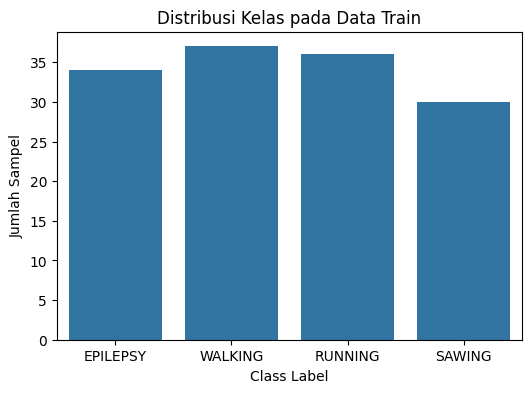

In [ ]:
# -----------------------------
# Visualisasi Distribusi Kelas
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Distribusi Kelas pada Data Train")
plt.xlabel("Class Label")
plt.ylabel("Jumlah Sampel")
plt.show()


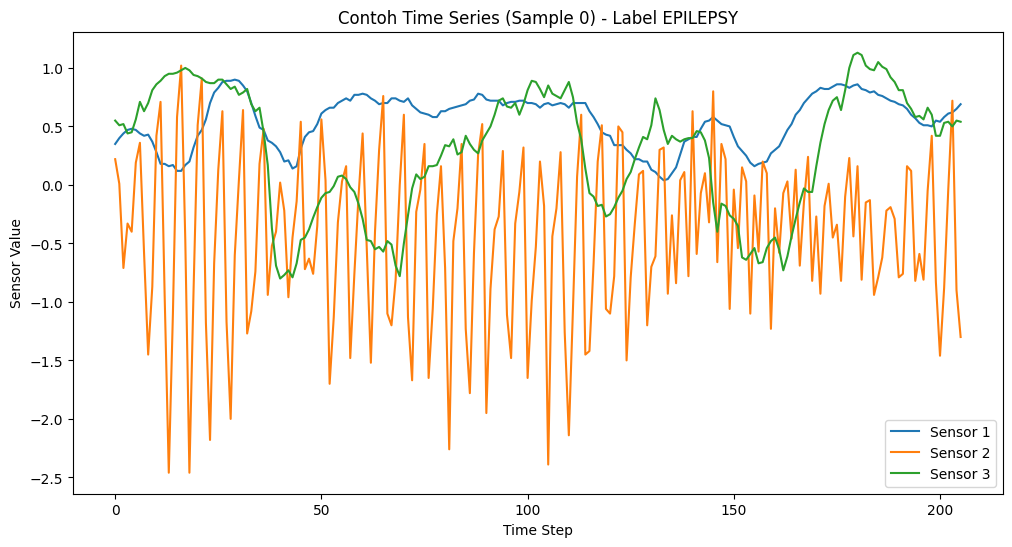

In [ ]:
# -----------------------------
# Visualisasi Sample Time Series
# -----------------------------
import matplotlib.pyplot as plt

# Ambil jumlah fitur dari dimensi data
n_features = X_train.shape[2]   # biasanya 3 (X,Y,Z)

plt.figure(figsize=(12,6))

index = 0  # sample pertama
sample = X_train[index]

for f in range(n_features):
    plt.plot(sample[:, f], label=f"Sensor {f+1}")

plt.title(f"Contoh Time Series (Sample {index}) - Label {y_train[index]}")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()


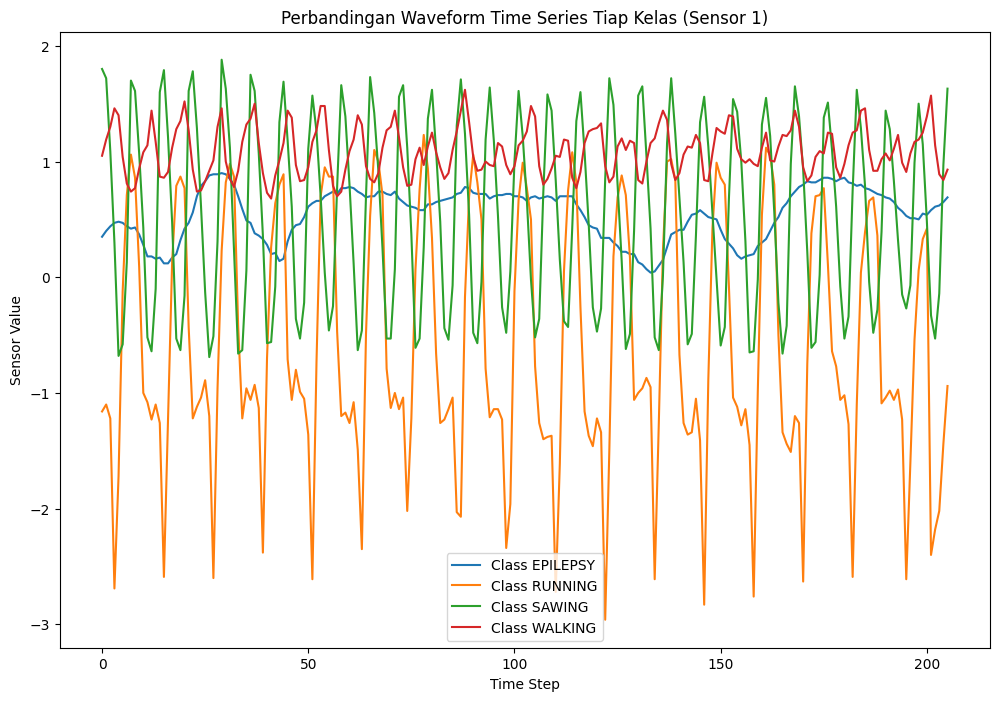

In [ ]:
# -----------------------------
# Visualisasi Per Kelas
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt

# Ambil kelas unik
unique_classes = np.unique(y_train)

plt.figure(figsize=(12,8))

# Plot contoh 1 sample untuk setiap kelas (sensor pertama saja)
for cls in unique_classes:
    idx = np.where(y_train == cls)[0][0]  # ambil index sample pertama dari kelas ini
    plt.plot(X_train[idx, :, 0], label=f"Class {cls}")

plt.title("Perbandingan Waveform Time Series Tiap Kelas (Sensor 1)")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()


## Preprocessing Data

Tahap preprocessing pada dataset *Epilepsy* dilakukan melalui beberapa langkah penting sebelum proses pemodelan. Pertama, data time series yang awalnya berbentuk 3 dimensi di-*flatten* menjadi 2 dimensi agar dapat digunakan oleh algoritma machine learning konvensional seperti SVM, KNN, dan Random Forest. Kemudian, label kelas yang semula berupa teks diubah menjadi representasi numerik menggunakan *Label Encoder* sehingga dapat diproses oleh model. Selanjutnya, seluruh fitur dinormalisasi menggunakan *StandardScaler* untuk menyeragamkan skala data dengan cara mengurangi nilai mean dan membaginya dengan standar deviasi. Normalisasi ini penting karena model seperti SVM dan KNN sangat sensitif terhadap perbedaan skala antar fitur. Dengan preprocessing ini, data menjadi lebih bersih, terstruktur, dan siap digunakan untuk proses pemodelan.


### Flattening Data
Proses flatten dilakukan untuk mengubah struktur data time series dari bentuk 3 dimensi `(n_samples, time_steps, 1)` menjadi bentuk 2 dimensi `(n_samples, total_features)` agar dapat digunakan oleh algoritma machine learning tradisional yang hanya menerima input 2D. Pada tahap ini, setiap deret waktu dari satu sampel diratakan menjadi satu baris fitur dengan menggunakan fungsi `reshape`. Setelah dilakukan flatten, bentuk data ditampilkan untuk memastikan perubahan dimensi berjalan dengan benar, dan lima baris pertama hasil transformasi juga ditampilkan sebagai contoh. Tahap ini penting karena tanpa flatten, model seperti SVM, Logistic Regression, dan Random Forest tidak dapat memproses data time series secara langsung.


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --------------------------------------------------------
# Flatten time series menjadi 2D
# --------------------------------------------------------
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d  = X_test.reshape(X_test.shape[0], -1)

# --------------------------------------------------------
# Tampilkan hasil flatten
# --------------------------------------------------------
print("=== HASIL FLATTEN DATA ===")
print("Original X_train shape :", X_train.shape)
print("Original X_test shape  :", X_test.shape)

print("Flatten X_train_2d shape:", X_train_2d.shape)
print("Flatten X_test_2d shape :", X_test_2d.shape)

print("\nContoh 5 baris pertama X_train_2d:")
print(X_train_2d[:5])


=== HASIL FLATTEN DATA ===
Original X_train shape : (137, 206, 3)
Original X_test shape  : (138, 206, 3)
Flatten X_train_2d shape: (137, 618)
Flatten X_test_2d shape : (138, 618)

Contoh 5 baris pertama X_train_2d:
[[ 0.35  0.22  0.55 ...  0.69 -1.3   0.54]
 [-0.91 -0.05  0.06 ... -0.45  0.76 -0.78]
 [ 0.32  1.    0.37 ...  0.59  1.23  0.66]
 [-0.68 -1.69  0.31 ... -0.25 -0.24 -0.7 ]
 [ 0.34 -0.89  0.45 ...  0.12  1.04  0.25]]


### Encoding Label

Kode tersebut melakukan proses **encoding label** dari bentuk aslinya (misalnya label berupa angka tidak berurutan atau kategori tertentu) menjadi label numerik terurut (0, 1, 2) menggunakan `LabelEncoder`. Pertama, objek `LabelEncoder` dibuat, lalu `fit_transform()` digunakan pada `y_train` untuk mempelajari label asli dan mengubahnya menjadi bentuk ter-encode; sedangkan `y_test` hanya di-*transform* agar mengikuti pola pengodean yang sama. Setelah itu, kode menampilkan hasil encoding dengan mencetak label unik sebelum dan sesudah encoding, serta menampilkan contoh 10 label awal dibandingkan dengan hasil encoding-nya. Langkah ini memastikan label sudah dalam format numerik yang sesuai untuk pemodelan machine learning.


In [ ]:
# --------------------------------------------------------
# Encoding label (0,1,2)
# --------------------------------------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# --------------------------------------------------------
# Tampilkan hasil encoding
# --------------------------------------------------------
print("=== HASIL ENCODING LABEL ===")
print("Label unik sebelum encoding :", np.unique(y_train))
print("Label unik sesudah encoding :", np.unique(y_train_enc))

print("\nContoh 10 label sebelum encoding:")
print(y_train[:10])

print("\nContoh 10 label sesudah encoding:")
print(y_train_enc[:10])



=== HASIL ENCODING LABEL ===
Label unik sebelum encoding : ['EPILEPSY' 'RUNNING' 'SAWING' 'WALKING']
Label unik sesudah encoding : [0 1 2 3]

Contoh 10 label sebelum encoding:
['EPILEPSY' 'EPILEPSY' 'EPILEPSY' 'EPILEPSY' 'EPILEPSY' 'EPILEPSY'
 'EPILEPSY' 'EPILEPSY' 'EPILEPSY' 'EPILEPSY']

Contoh 10 label sesudah encoding:
[0 0 0 0 0 0 0 0 0 0]


### Normalisasi

Kode tersebut melakukan proses **normalisasi fitur** menggunakan `StandardScaler` setelah data time series diflatten menjadi bentuk 2D. `StandardScaler` bekerja dengan mengubah setiap fitur agar memiliki **mean = 0** dan **standar deviasi = 1**, sehingga model machine learning dapat belajar lebih stabil dan tidak bias terhadap fitur yang memiliki skala besar. Pertama, scaler dilatih pada data training menggunakan `fit_transform()` untuk menghitung parameter normalisasi, lalu parameter ini digunakan kembali pada data testing menggunakan `transform()` agar preprocessing konsisten. Terakhir, kode mencetak ukuran data yang sudah dinormalisasi untuk memastikan hasilnya sesuai dengan jumlah sampel dan fitur setelah proses flatten selesai.


In [ ]:
# Normalisasi data
# --------------------------------------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled  = scaler.transform(X_test_2d)

print("Preprocessing (flatten) selesai.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape :", X_test_scaled.shape)

Preprocessing (flatten) selesai.
X_train_scaled shape: (137, 618)
X_test_scaled shape : (138, 618)


### Cek Missing Value

Kode di atas digunakan untuk memeriksa apakah terdapat nilai kosong (missing values) pada data train dan data test setelah proses flatten. Pertama, X_train_2d dan X_test_2d diubah menjadi DataFrame agar lebih mudah dianalisis menggunakan fungsi bawaan Pandas. Kemudian, fungsi isnull().sum().sum() digunakan untuk menghitung total seluruh nilai kosong pada setiap dataset. Hasil yang ditampilkan menunjukkan apakah terdapat data yang hilang selama proses loading, flatten, atau preprocessing. Jika hasilnya 0, berarti semua nilai lengkap dan dataset aman digunakan untuk pemodelan tanpa perlu melakukan imputasi atau penanganan missing value tambahan.

In [ ]:
import numpy as np
import pandas as pd

# Mengubah X_train dan X_test hasil flatten menjadi DataFrame
df_train = pd.DataFrame(X_train_2d)
df_test  = pd.DataFrame(X_test_2d)

# Cek missing value
print("=== CEK MISSING VALUE ===")
print("Missing value pada data train:", df_train.isnull().sum().sum())
print("Missing value pada data test :", df_test.isnull().sum().sum())


=== CEK MISSING VALUE ===
Missing value pada data train: 0
Missing value pada data test : 0


### Cek Outlier

Kode ini digunakan untuk mendeteksi apakah suatu sampel (baris) dalam dataset memiliki nilai yang dianggap outlier berdasarkan metode Z-score, yaitu nilai yang lebih dari 3 standar deviasi dari rata-rata. Pertama, dihitung Z-score pada setiap fitur menggunakan data yang sudah dinormalisasi (X_train_scaled dan X_test_scaled), sehingga skala seluruh fitur sudah setara. Kemudian, np.any(z_train > threshold, axis=1) digunakan untuk menandai apakah minimal satu fitur dalam satu sampel memiliki nilai outlier. Dengan cara ini, kita tidak menghitung jumlah outlier per fitur, tetapi fokus pada apakah satu sampel bersifat abnormal atau tidak. Setelah terdeteksi, jumlah sampel outlier dihitung dan indeksnya ditampilkan. Terakhir, sampel outlier pada data train dihapus sehingga diperoleh X_train_clean dan y_train_clean, yang merupakan data latih yang lebih bersih dan stabil untuk pemodelan. Proses ini membantu mengurangi noise ekstrem yang dapat mengganggu performa model.

In [ ]:
import numpy as np

# -------------------------------------------
# DETEKSI OUTLIER PER SAMPEL (Z-score > 3)
# -------------------------------------------

threshold = 3   # batas standar untuk outlier

# Hitung z-score untuk setiap nilai
z_train = np.abs((X_train_scaled - X_train_scaled.mean(axis=0)) / X_train_scaled.std(axis=0))
z_test  = np.abs((X_test_scaled  - X_test_scaled.mean(axis=0))  / X_test_scaled.std(axis=0))

# Cek apakah satu sampel mengandung minimal satu outlier
outlier_samples_train = np.any(z_train > threshold, axis=1)
outlier_samples_test  = np.any(z_test  > threshold, axis=1)

# Hitung jumlah sampel outlier
num_outliers_train = np.sum(outlier_samples_train)
num_outliers_test  = np.sum(outlier_samples_test)

print("Jumlah SAMPLE TRAIN yang mengandung outlier :", num_outliers_train)
print("Index sampel train outlier :", np.where(outlier_samples_train)[0])

print("\nJumlah SAMPLE TEST yang mengandung outlier :", num_outliers_test)
print("Index sampel test outlier :", np.where(outlier_samples_test)[0])


Jumlah SAMPLE TRAIN yang mengandung outlier : 47
Index sampel train outlier : [  1   5   9  11  12  20  24  25  26  27  28  31  62  71  72  73  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106]

Jumlah SAMPLE TEST yang mengandung outlier : 51
Index sampel test outlier : [  1   4   5   8  11  12  13  14  18  21  22  33  37  43  61  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107]


In [ ]:
X_train_clean = X_train_scaled[~outlier_samples_train]
y_train_clean = y_train[~outlier_samples_train]

print("Shape train setelah buang outlier:", X_train_clean.shape)


Shape train setelah buang outlier: (90, 618)


## Pemodelan Data

Pada tahap pemodelan data, algoritma machine learning digunakan untuk mengklasifikasikan empat yang direkam menggunakan tri-axial accelerometer pada enam partisipan. Setelah dataset distandarkan menjadi 275 sampel dengan panjang time series seragam dan dibagi berdasarkan partisipan (tiga untuk train, tiga untuk test), data di-flatten dari 3D ke 2D dan dinormalisasi agar skala ketiga sumbu sensor setara. Selanjutnya beberapa model seperti SVM, KNN, dan Random Forest dilatih menggunakan parameter dasar untuk memperoleh baseline performance. Model kemudian diuji menggunakan data test dan dievaluasi dengan akurasi, classification report, dan confusion matrix untuk menentukan algoritma yang paling efektif dalam mengenali aktivitas normal maupun gerakan epilepsy dari sinyal accelerometer.

### Perbandingan Model

Kode tersebut melakukan **pemodelan dan evaluasi beberapa algoritma machine learning** untuk klasifikasi dataset *Epilepsy*. Pertama, beberapa model didefinisikan dalam dictionary `models`, meliputi **KNN, SVM dengan kernel RBF, Random Forest, Gradient Boosting, Logistic Regression, dan MLP Neural Network**. Selanjutnya, setiap model dilatih menggunakan `X_train_scaled` dan label ter-encode `y_train_enc`, kemudian melakukan prediksi pada `X_test_scaled`. Hasil prediksi dievaluasi menggunakan **accuracy** dan `classification_report` (precision, recall, F1-score) untuk melihat performa tiap model. Akhirnya, semua hasil akurasi dikumpulkan ke dalam DataFrame `df_results` sehingga dapat dibandingkan dengan mudah, memberikan gambaran model mana yang paling efektif untuk dataset tersebut.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --------------------------------------------------------
# Daftar model yang akan dibandingkan
# --------------------------------------------------------
models = {
    "KNN"                : KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)"          : SVC(kernel='rbf'),
    "Random Forest"      : RandomForestClassifier(n_estimators=150, random_state=42),
    "Gradient Boosting"  : GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP Neural Network" : MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
}

# --------------------------------------------------------
# Evaluasi setiap model
# --------------------------------------------------------
result_list = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_enc)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test_enc, y_pred)
    result_list.append([model_name, acc])

    print(f"\n=== {model_name} ===")
    print("Accuracy :", acc)
    print("Classification Report:")
    print(classification_report(y_test_enc, y_pred))

# --------------------------------------------------------
# Tabel Perbandingan Akurasi
# --------------------------------------------------------
df_results = pd.DataFrame(result_list, columns=["Model", "Accuracy"])
print("\n\n=== HASIL PERBANDINGAN MODEL ===")
print(df_results)



=== KNN ===
Accuracy : 0.5217391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.15      0.25        34
           1       1.00      0.03      0.05        37
           2       0.71      0.97      0.82        30
           3       0.41      1.00      0.58        37

    accuracy                           0.52       138
   macro avg       0.74      0.54      0.43       138
weighted avg       0.74      0.52      0.41       138


=== SVM (RBF) ===
Accuracy : 0.8405797101449275
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        34
           1       0.97      0.97      0.97        37
           2       0.70      1.00      0.82        30
           3       0.92      0.89      0.90        37

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.83       138
weighted avg       0.85      0.84      0.83    

### Model Yang Digunakan

Kode tersebut melakukan **pemodelan klasifikasi menggunakan algoritma Support Vector Machine (SVM)** dengan kernel RBF. Pertama, model SVM diinisialisasi menggunakan `SVC(kernel='rbf', C=1, gamma='scale')`, di mana `C=1` mengatur penalti kesalahan dan `gamma='scale'` mengontrol pengaruh jarak antar titik data pada kernel. Selanjutnya, model dilatih (`fit`) menggunakan data training yang sudah dinormalisasi (`X_train_scaled`) dan label yang telah di-encode (`y_train_enc`). Setelah pelatihan selesai, model digunakan untuk melakukan prediksi (`predict`) pada data testing (`X_test_scaled`) dan hasil prediksi disimpan di `y_pred_svm`. Terakhir, dicetak konfirmasi bahwa proses pelatihan SVM telah selesai.


In [ ]:
# --------------------------------------------------------
# PEMODELAN DATA – SVM
# --------------------------------------------------------
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Training
svm_model.fit(X_train_scaled, y_train_enc)

# Prediksi
y_pred_svm = svm_model.predict(X_test_scaled)

print("Model SVM selesai dilatih.")


Model SVM selesai dilatih.


### Evaluasi

Kode tersebut melakukan **evaluasi model SVM** yang sebelumnya telah dilatih. Pertama, dihitung **akurasi** model menggunakan `accuracy_score` untuk mengetahui persentase prediksi yang benar. Selanjutnya, `classification_report` digunakan untuk menampilkan metrik lebih rinci, termasuk **precision, recall, dan F1-score** tiap kelas. Kemudian, dibuat **confusion matrix** dengan `confusion_matrix` untuk melihat jumlah prediksi benar dan salah per kelas. Terakhir, confusion matrix divisualisasikan menggunakan `seaborn.heatmap` agar lebih mudah dibaca, dengan sumbu x mewakili label prediksi dan sumbu y mewakili label sebenarnya, sehingga memberikan gambaran visual performa model SVM dalam membedakan kelas.


Akurasi SVM: 0.8405797101449275

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        34
           1       0.97      0.97      0.97        37
           2       0.70      1.00      0.82        30
           3       0.92      0.89      0.90        37

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.83       138
weighted avg       0.85      0.84      0.83       138


Confusion Matrix:
[[17  1 13  3]
 [ 1 36  0  0]
 [ 0  0 30  0]
 [ 4  0  0 33]]


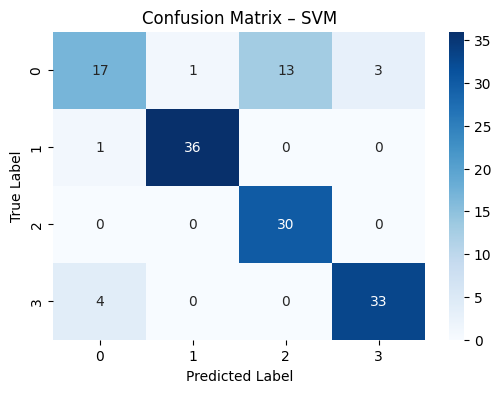

In [ ]:
# --------------------------------------------------------
# EVALUASI MODEL – SVM
# --------------------------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
svm_acc = accuracy_score(y_test_enc, y_pred_svm)
print("Akurasi SVM:", svm_acc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred_svm)
print("\nConfusion Matrix:")
print(cm)

# --------------------------------------------------------
# Visualisasi Confusion Matrix
# --------------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Link Streamlit:

https://uasepilepsyirnakhalda.streamlit.app/